<a href="https://colab.research.google.com/github/truongthuanr/transfer/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
import tensorflow as tf


In [2]:

def load_dataset():
  # load dataset
  (X_train, y_train), (X_test, y_test) = cifar10.load_data()

  # summary loaded dataset
  print(f'Train: X={X_train.shape}, y={y_train.shape}')
  print(f"Test: X={X_test.shape}, y={y_test.shape}")

  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return X_train, y_train, X_test, y_test

In [3]:
def prep_pixels(train, test):
  # convert from integers
  train_norm = train.astype('float32')
  test_norm  = test.astype('float32')
  # nomalize to range (0-1)
  train_norm = train_norm/255.0
  test_norm = test_norm/255.0

  return train_norm, test_norm

In [4]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation="relu", kernel_initializer='he_uniform',
                   padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3,3), activation="relu", kernel_initializer='he_uniform',
                   padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(32, (3,3), activation="relu", kernel_initializer='he_uniform',
                   padding='same'))
  model.add(Conv2D(32, (3,3), activation="relu", kernel_initializer='he_uniform',
                   padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(32, (3,3), activation="relu", kernel_initializer='he_uniform',
                   padding='same'))
  model.add(Conv2D(32, (3,3), activation="relu", kernel_initializer='he_uniform',
                   padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer="he_uniform"))
  model.add(Dense(10, activation="softmax"))

  # Compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

  return model

In [9]:
# Plot diagnostic learning curve
def summarize_diagnostics(history):
  plt.figure(figsize=(10,7))
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')

  # Plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')


In [20]:
def run_test_harness():
  # load dataset
  X_train, y_train, X_test, y_test = load_dataset()
  # prepare pixel data
  X_train, X_test = prep_pixels(X_train, X_test)
  # Define model
  model = define_model()
  # fit model
  history = model.fit(X_train, y_train,
                      epochs=50,
                      batch_size=64,
                      validation_data= (X_test, y_test)
                      )
  # Evaluate model
  _, acc = model.evaluate(X_test, y_test)
  print(f"{acc*100.0:.3f}")
  # learning curve
  summarize_diagnostics(history)

In [21]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Epoch 1/50
782/782 [==============================] - 13s 16ms/step - loss: 1.8633 - accuracy: 0.3226 - val_loss: 1.6014 - val_accuracy: 0.4222
Epoch 2/50
782/782 [==============================] - 11s 14ms/step - loss: 1.4994 - accuracy: 0.4585 - val_loss: 1.4172 - val_accuracy: 0.4953
Epoch 3/50
782/782 [==============================] - 12s 15ms/step - loss: 1.3429 - accuracy: 0.5186 - val_loss: 1.2798 - val_accuracy: 0.5382
Epoch 4/50
782/782 [==============================] - 12s 15ms/step - loss: 1.2215 - accuracy: 0.5622 - val_loss: 1.1568 - val_accuracy: 0.5837
Epoch 5/50
782/782 [==============================] - 12s 15ms/step - loss: 1.1301 - accuracy: 0.5977 - val_loss: 1.1009 - val_accuracy: 0.6100
Epoch 6/50
782/782 [==============================] - 11s 15ms/step - loss: 1.0636 - accuracy: 0.6224 - val_loss: 1.0897 - val_accuracy: 0.6079
Epoch 7/50
782/782 [==============================] -

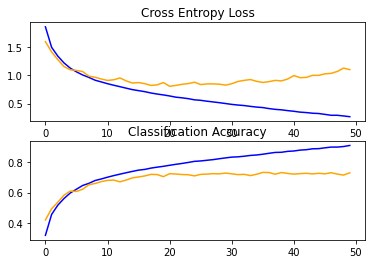

In [22]:
run_test_harness()